In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
df = pd.read_csv('client_segmentation.csv')
df.head()

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0


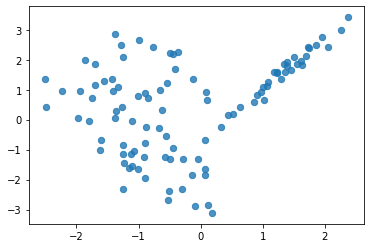

In [167]:
X = df[['call_diff','sms_diff','traffic_diff']].values
y = df.customes_class.values

X1 = df[['call_diff','traffic_diff']].values

plt.scatter(X[:,0], X[:, 2],  s=40, marker='o', alpha=0.8, label='data')
plt.show()

In [168]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X1)
X_pca = pca.transform(X1)
X_pca[:10]

array([[-0.86388574],
       [-2.46273415],
       [-0.05616347],
       [ 1.91449524],
       [-2.15285129],
       [ 0.83453235],
       [ 1.6551052 ],
       [-1.84171309],
       [-2.29403214],
       [ 1.49844584]])

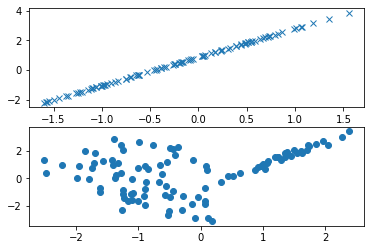

In [169]:
X_new = pca.inverse_transform(X_pca)

plt.figure(1)
plt.subplot(211)
plt.plot(X_new[:,0], X_new[:,1], 'x')

plt.subplot(212)
plt.plot(X1[:,0], X1[:,1], 'o')



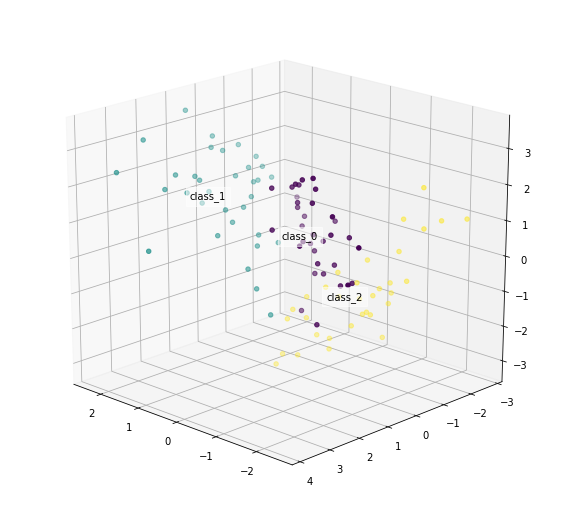

In [45]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# и визуализируем их
fig = plt.figure(1, figsize=(8, 7))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
plt.show()

In [165]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2).fit(X)
X_pca1 = pca1.transform(X)
X_pca1[:10]

array([[-0.75744517, -0.16623077],
       [-2.61154618, -0.5951692 ],
       [ 0.13301346,  0.37383597],
       [ 1.74983161, -0.27582433],
       [-2.69734129,  0.31624463],
       [ 0.70860533,  0.51547171],
       [ 1.27113452, -0.04822069],
       [-2.16755366, -0.04137214],
       [-2.58986361, -0.08695463],
       [ 1.6981062 ,  1.16822327]])

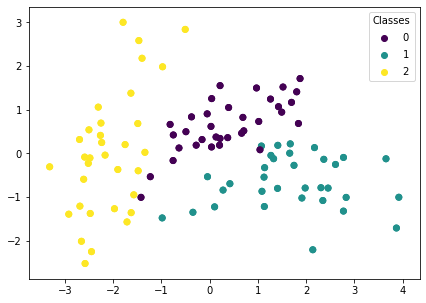

In [176]:
fig, ax = plt.subplots(figsize =(7,5))
num_labels = np.unique(y).size
scatter = ax.scatter(X_pca1[:,0], X_pca1[:,1], c=y)

ax.scatter(X_pca1[:, 0], X_pca1[:, 1], c=y)
ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
plt.show()


In [177]:
from numpy.linalg import svd, det

A = np.array([[3,2,2],[2,3,-2]])

In [183]:
U = np.linalg.svd(A)[0]

In [184]:
np.linalg.det(U)

-1.0000000000000004

<class 'numpy.ndarray'> (380, 509, 3)


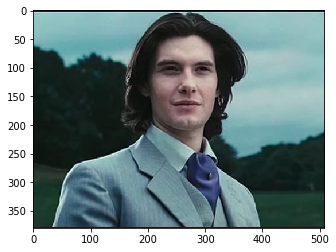

In [187]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
img = mpimg.imread('dorian_grey.png')
print(type(img),img.shape)
imshow(img)
plt.show()

<class 'numpy.ndarray'> (380, 509)


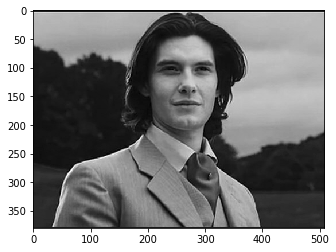

In [188]:
def rgb2gray(rgb):
    tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1],1))
    return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)
print(type(img_gray), img_gray.shape)
imshow(img_gray, cmap = "gray")
plt.show()

In [189]:
from sklearn.decomposition import TruncatedSVD

In [192]:
X2 = img_gray

In [215]:
svd_model = TruncatedSVD(n_components=5).fit(X2)

X_svd = svd_model.transform(X2)
X_svd_restored = svd_model.inverse_transform(X_svd)

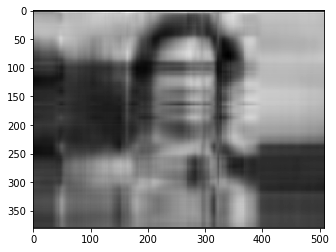

In [216]:
imshow(X_svd_restored, cmap = "gray")
plt.show()

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def eval_model(input_x, input_y):
    """Обучаем и валидируем модель"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)
    
df_source = pd.read_csv('client_segmentation.csv')
X3 = df_source[['call_diff','sms_diff','traffic_diff']].values
y3 = df_source.customes_class.values

In [207]:
eval_model(X3, y3)

Accuracy: 0.80000


In [209]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components=2).fit(X3)
X_pca3 = pca3.transform(X3)


array([[-0.75744517, -0.16623077],
       [-2.61154618, -0.5951692 ],
       [ 0.13301346,  0.37383597],
       [ 1.74983161, -0.27582433],
       [-2.69734129,  0.31624463],
       [ 0.70860533,  0.51547171],
       [ 1.27113452, -0.04822069],
       [-2.16755366, -0.04137214],
       [-2.58986361, -0.08695463],
       [ 1.6981062 ,  1.16822327]])

In [210]:
eval_model(X_pca3, y3)

Accuracy: 0.83333


In [212]:
from sklearn.manifold import TSNE

tsne_transformer = TSNE(n_components=2)

x_tsne = tsne_transformer.fit_transform(X3)

eval_model(x_tsne, y3)

Accuracy: 0.93333
